In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
# import randomized search
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from prophet import Prophet
from prophet.diagnostics import cross_validation
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import ParameterSampler
import plotly.express as px
import plotly.graph_objects as go
from prophet.diagnostics import cross_validation, performance_metrics
from common.preprocessor import load_data
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

In [5]:
# Load dataset
data = load_data('./data','Commodity Prices Monthly.csv')

In [6]:
data.head()

,Price
2002-01-01,19.96
2002-02-01,20.19
2002-03-01,24.03
2002-04-01,26.03
2002-05-01,25.69


In [7]:
data = data.reset_index()

In [8]:
data.head()

,index,Price
0,2002-01-01,19.96
1,2002-02-01,20.19
2,2002-03-01,24.03
3,2002-04-01,26.03
4,2002-05-01,25.69


In [9]:
data.columns = ['ds', 'y']

In [10]:
data

,ds,y
0,2002-01-01,19.96
1,2002-02-01,20.19
2,2002-03-01,24.03
3,2002-04-01,26.03
4,2002-05-01,25.69
...,...,...
247,2022-08-01,97.74
248,2022-09-01,90.57
249,2022-10-01,93.60
250,2022-11-01,90.38


In [11]:
data[['y']]

,y
0,19.96
1,20.19
2,24.03
3,26.03
4,25.69
...,...
247,97.74
248,90.57
249,93.60
250,90.38


In [12]:
data.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [13]:
data.describe() # display the summary statistics of the data


,y
count,252.000000
mean,69.464722
std,28.030720
min,19.960000
25%,48.472500
50%,65.475000
75%,91.955000
max,134.790000


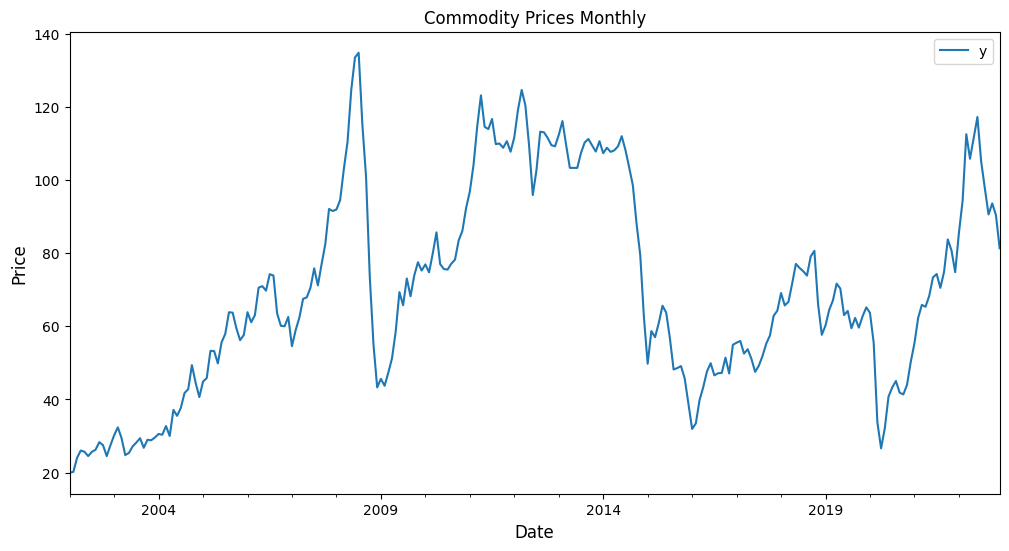

In [14]:
# plot the data
data.plot(x='ds', y= 'y', title='Commodity Prices Monthly', figsize=(12, 6))
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

In [15]:
# set training and testing start dates
train = data[['ds', 'y']].copy()
test = data[['ds', 'y']].copy()

In [16]:
train = train[train['ds'] < '2019-01-01']
test = test[test['ds'] >= '2019-01-01']

train.head()

,ds,y
0,2002-01-01,19.96
1,2002-02-01,20.19
2,2002-03-01,24.03
3,2002-04-01,26.03
4,2002-05-01,25.69


In [17]:
test.head()

,ds,y
204,2019-01-01,60.23
205,2019-02-01,64.50
206,2019-03-01,67.05
207,2019-04-01,71.66
208,2019-05-01,70.30


In [18]:
# train = pd.read_csv('train_data.csv')
# test = pd.read_csv('test_data.csv')

In [19]:
Prophet??

Init signature:
Prophet(
    growth='linear',
    changepoints=None,
    n_changepoints=25,
    changepoint_range=0.8,
    yearly_seasonality='auto',
    weekly_seasonality='auto',
    daily_seasonality='auto',
    holidays=None,
    seasonality_mode='additive',
    seasonality_prior_scale=10.0,
    holidays_prior_scale=10.0,
    changepoint_prior_scale=0.05,
    mcmc_samples=0,
    interval_width=0.8,
    uncertainty_samples=1000,
    stan_backend=None,
    scaling: str = 'absmax',
    holidays_mode=None,
)
Source:        
class Prophet(object):
    """Prophet forecaster.

    Parameters
    ----------
    growth: String 'linear', 'logistic' or 'flat' to specify a linear, logistic or
        flat trend.
    changepoints: List of dates at which to include potential changepoints. If
        not specified, potential changepoints are selected automatically.
    n_changepoints: Number of potential changepoints to include. Not used
        if input `changepoints` is supplied. If `changepoin

In [20]:
from sklearn.base import BaseEstimator
# perform hyperparameter tuning with randomized search
# define the parameter grid
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative'],
    'n_changepoints': [10, 20, 30, 40, 50],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'holidays_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative'],
    'daily_seasonality': [True, False],
    'weekly_seasonality': [True, False],
    'yearly_seasonality': [True, False]
}

# initialize the model
class ProphetEstimator(BaseEstimator):
    def __init__(self, **kwargs):
        self.model = Prophet(**kwargs)
    
    def fit(self, X, y=None):
        self.model.fit(X, y)
        return self
    
    def predict(self, X):
        return self.model.predict(X)

    def score(self, X, y):
        prediction = self.predict(X)
        return mean_absolute_error(y, predictions)
# {'seasonality_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'n_changepoints': 10, 'holidays_prior_scale': 0.1, 'daily_seasonality': False, 'weekly_seasonality': False, 'yearly_seasonality': True, 'changepoint_prior_scale': 0.1}

# initialize the model
model = ProphetEstimator(seasonality_prior_scale=0.1, seasonality_mode='multiplicative', n_changepoints=10, holidays_prior_scale=0.1, daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=True, changepoint_prior_scale=0.1)

# perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(train)


Fitting 5 folds for each of 5120 candidates, totalling 25600 fits


ValueError: Invalid parameter 'changepoint_prior_scale' for estimator ProphetEstimator(). Valid parameters are: [].

In [ ]:

# Initialize the Prophet model
model = Prophet()

In [ ]:
# Fit the model with your training data
model.fit(train)

In [ ]:
model.component_modes

In [ ]:
test.shape

In [ ]:

# Create an empty dataframe to hold your future predictions
future = model.make_future_dataframe(periods=len(test), freq='MS', include_history=True)
future.shape

In [ ]:
# Use the model to make predictions
forecast = model.predict(future)

In [ ]:
forecast[['ds', 'yhat']]

In [ ]:

# Plot the original data and the forecast
model.plot(forecast)
plt.show()

In [ ]:
# plot actual vs predicted
fig = go.Figure([go.Scatter(x=data['ds'], y=data['y'],mode='lines',
                    name='Actual')])
#You can add traces using an Express plot by using add_trace
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'],
                   mode='lines+markers',
                    name='predicted'))
#To display a figure using the renderers framework, you call the .show() method on a graph object figure, or pass the figure to the plotly.io.show function. 
#With either approach, plotly.py will display the figure using the current default renderer(s).
fig.show()

In [ ]:
model.plot_components(forecast)

In [ ]:
forecast[['ds','yhat']]

In [ ]:
data

In [ ]:
forecast[['ds','yhat']]

In [ ]:
# evaluation with mae and mape
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
mae = mean_absolute_error(data['y'], forecast['yhat'])
print('Mean Absolute Error: %.3f' % mae)

In [ ]:
mape = mean_absolute_percentage_error(data['y'], forecast['yhat'])
print('Mean Absolute Percentage Error: %.3f' % mape)

### Introducing Hyper parameter tuning


In [ ]:
tuned_model=Prophet(yearly_seasonality=True).add_seasonality(name='yearly',period=len(test),fourier_order=70)

In [ ]:
tuned_model.fit(train)


In [ ]:
tuned_model.component_modes

In [ ]:
future_dates=tuned_model.make_future_dataframe(periods=len(test),freq='MS',include_history=True)


In [ ]:
future_dates=tuned_model.predict(future_dates)

In [ ]:
# Calculate the mean absolute error (MAE) using the consistent data
tuned_mae = mean_absolute_error(data['y'][:len(future_dates)], future_dates['yhat'][:len(data)])
print('Mean Absolute Error: %.3f' % tuned_mae)


In [ ]:
tuned_model.plot(future_dates)
plt.show()

In [ ]:
??Prophet

In [ ]:
print(train.shape, test.shape)

In [ ]:
# Load the data
df = data  

# Define the parameter grid for the randomized search
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative'],
    'n_changepoints': [10, 20, 30, 40, 50],
    'holidays_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'yearly_seasonality': [True, False],
}

# Placeholder for best parameters and lowest error
best_params = None
lowest_error = float('inf')

# Define the number of iterations for the randomized search
n_iter = 10

# Perform randomized search
for params in ParameterSampler(param_grid, n_iter):
    m = Prophet(**params)
    m.fit(df)
    # days to months = 365.25 * num of days 
    df_cv = cross_validation(m, initial='5844 D', period='1461 D', horizon = '1461 D')
    error = mean_absolute_error(df_cv['y'], df_cv['yhat'])
    
    if error < lowest_error:
        best_params = params
        lowest_error = error

# Print the best parameters
print(f"Best parameters: {best_params}")

# Fit and predict with the best parameters
m = Prophet(**best_params)
m.fit(df)
future = m.make_future_dataframe(periods=48, freq='MS')
forecast = m.predict(future)

# Plot the forecast
fig = m.plot(forecast)



In [ ]:
error = mean_absolute_error(df_cv['y'], df_cv['yhat'])
print('Mean Absolute Error: %.3f' % error)

In [ ]:
error = mean_absolute_percentage_error(df_cv['y'], df_cv['yhat'])
print('Mean Absolute Percentage Error: %.3f' % error)